In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns




In [ ]:
url= './drive/MyDrive/CEG/Data Science Lab/netflix_titles.csv'
df = pd.read_csv(url)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# df= df.set_index('show_id')
# df.head()

In [ ]:
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

In [ ]:
# df.loc['s200':, 'release_year'].head(10)

In [ ]:
df['country'].head(10)

0                                        United States
1                                         South Africa
2                                                  NaN
3                                                  NaN
4                                                India
5                                                  NaN
6                                                  NaN
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

In [ ]:
country=df['country']
us= country.str.contains('United States')
us[:13]

0      True
1     False
2       NaN
3       NaN
4     False
5       NaN
6       NaN
7      True
8     False
9      True
10      NaN
11      NaN
12    False
Name: country, dtype: object

In [ ]:
df['country']=np.where(us,'USA',country.str.replace('-',' '))
df['country'].head(20)

0                         USA
1                South Africa
2                         USA
3                         USA
4                       India
5                         USA
6                         USA
7                         USA
8              United Kingdom
9                         USA
10                        USA
11                        USA
12    Germany, Czech Republic
13                        USA
14                        USA
15                        USA
16                        USA
17                     Mexico
18                        USA
19                        USA
Name: country, dtype: object

In [ ]:
country=df['country']
us= country.str.contains('Germany')
us[:5]

0    False
1    False
2    False
3    False
4    False
Name: country, dtype: bool

In [ ]:
df['country']=np.where(us,'Germany',country.str.replace('-',' '))
df['country'].head(20)

0                USA
1       South Africa
2                USA
3                USA
4              India
5                USA
6                USA
7                USA
8     United Kingdom
9                USA
10               USA
11               USA
12           Germany
13               USA
14               USA
15               USA
16               USA
17            Mexico
18               USA
19               USA
Name: country, dtype: object

# Null value Treatment


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.dropna(inplace=True) # Remove empty cells
df.tail()
#to replace null values use df.fillna(140, inplace=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",USA,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",USA,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",USA,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Removing Unwanted data

In [ ]:
to_drop=['director', 'cast','show_id','title', 'country', 'date_added', 'release_year','duration','listed_in']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,type,rating,description
2,TV Show,TV-MA,To protect his family from a powerful drug lor...
5,TV Show,TV-MA,The arrival of a charismatic young priest brin...
6,Movie,PG,Equestria's divided. But a bright-eyed hero be...
7,Movie,TV-MA,"On a photo shoot in Ghana, an American model s..."
8,TV Show,TV-14,A talented batch of amateur bakers face off in...


# Converting Categorical Data


In [ ]:
type_of_show = df['type']
movies= type_of_show.str.contains('Movie')
movies[:5]

2    False
5    False
6     True
7     True
8    False
Name: type, dtype: bool

In [ ]:
tv_show= type_of_show.str.contains('TV Show')
tv_show[:5]


2     True
5     True
6    False
7    False
8     True
Name: type, dtype: bool

In [ ]:
df['type'] = df['type'].replace('TV Show', 1)
df['type'] = df['type'].replace('Movie', 0)
df['type'].head()

2    1
5    1
6    0
7    0
8    1
Name: type, dtype: int64

In [ ]:
df['rating'] = df['rating'].replace('TV-Y7-FV',1)
df['rating'] = df['rating'].replace('TV-Y7',2)
df['rating'] = df['rating'].replace('TV-Y',3)
df['rating'] = df['rating'].replace('TV-PG',4)
df['rating'] = df['rating'].replace('TV-MA',5)
df['rating'] = df['rating'].replace('TV-G',6)
df['rating'] = df['rating'].replace('TV-14',7)
df['rating'] = df['rating'].replace('R',8)
df['rating'] = df['rating'].replace('PG-13',9)
df['rating'] = df['rating'].replace('PG',10)
df['rating'] = df['rating'].replace('NR',11)
df['rating'] = df['rating'].replace('NC-17',12)
df['rating'] = df['rating'].replace('G',13)
df['rating'] = df['rating'].replace('UR',14)

df['rating'].head()

2     5
5     5
6    10
7     5
8     7
Name: rating, dtype: int64

# Loading into numpy array

In [ ]:
arr= np.array(df)
print(arr) # array
print(arr.ndim, "Dimentional array") # dimensions of the array

for i in range(10):
  print(arr[i][1]) # printing first 10 records in the 1st column
  print(arr[i][2]) # printing first 10 records in the 2st column
  # print(arr[i][3]) # printing first 10 records in the 3st column


[[1 5
  'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.']
 [1 5
  'The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe.']
 [0 10
  "Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it."]
 ...
 [0 8
  'Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.']
 [0 10
  'Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.']
 [0 7
  "A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."]]
2 Dimentional array
5
To protect his family from

# Implimenting Algorithms

In [ ]:
import spacy
import nltk

In [ ]:
from nltk.tokenize import word_tokenize
nlp = spacy.load("en_core_web_sm")

In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
stop_words = nlp.Defaults.stop_words
def processing(text):
  tokenize= word_tokenize(text)
  removeStop= [word for word in tokenize if word not in stop_words]
  return ' '.join(removeStop)

# result = []
df['stop_words_removed']=df['description'].apply(processing)
df['lemmatized']= df['stop_words_removed'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))

# for i in df['description']:
#   result.append()

In [ ]:
df.columns

Index(['type', 'rating', 'description', 'stop_words_removed', 'lemmatized'], dtype='object')

In [ ]:
df.head()

,type,rating,description,stop_words_removed,lemmatized
2,1,5,To protect his family from a powerful drug lor...,"To protect family powerful drug lord , skilled...","to protect family powerful drug lord , skilled..."
5,1,5,The arrival of a charismatic young priest brin...,The arrival charismatic young priest brings gl...,the arrival charismatic young priest bring glo...
6,0,10,Equestria's divided. But a bright-eyed hero be...,Equestria divided . But bright-eyed hero belie...,Equestria divide . but bright - eyed hero beli...
7,0,5,"On a photo shoot in Ghana, an American model s...","On photo shoot Ghana , American model slips ti...","on photo shoot Ghana , american model slip tim..."
8,1,7,A talented batch of amateur bakers face off in...,A talented batch amateur bakers face 10-week c...,a talented batch amateur baker face 10 - week ...


# VADER Senti analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


In [ ]:
def vadfun(text):
  return(sid.polarity_scores(text)['compound'])

df['compound_score']=df['lemmatized'].apply(vadfun)
df['senti_type']=df['compound_score'].apply(lambda x: 'Positive' if(x>0) else('Negative'if(x<0)else 'Neutral'))

In [ ]:
df.head(10)

,type,rating,description,stop_words_removed,lemmatized,compound_score,senti_type
2,1,5,To protect his family from a powerful drug lor...,"To protect family powerful drug lord , skilled...","to protect family powerful drug lord , skilled...",-0.8860,Negative
5,1,5,The arrival of a charismatic young priest brin...,The arrival charismatic young priest brings gl...,the arrival charismatic young priest bring glo...,0.1027,Positive
6,0,10,Equestria's divided. But a bright-eyed hero be...,Equestria divided . But bright-eyed hero belie...,Equestria divide . but bright - eyed hero beli...,0.9161,Positive
7,0,5,"On a photo shoot in Ghana, an American model s...","On photo shoot Ghana , American model slips ti...","on photo shoot Ghana , american model slip tim...",-0.8519,Negative
8,1,7,A talented batch of amateur bakers face off in...,A talented batch amateur bakers face 10-week c...,a talented batch amateur baker face 10 - week ...,0.8807,Positive
9,0,9,A woman adjusting to life after a loss contend...,A woman adjusting life loss contends feisty bi...,a woman adjust life loss contend feisty bird t...,-0.5267,Negative
11,1,5,"Struggling to earn a living in Bangkok, a man ...","Struggling earn living Bangkok , man joins eme...","struggle earn live Bangkok , man join emergenc...",-0.4215,Negative
12,0,5,After most of her family is murdered in a terr...,"After family murdered terrorist bombing , youn...","after family murder terrorist bombing , young ...",-0.9313,Negative
13,0,4,When the clever but socially-awkward Tetê join...,When clever socially-awkward Tetê joins new sc...,when clever socially - awkward Tetê join new s...,0.4678,Positive
18,0,7,After a deadly home invasion at a couple’s new...,After deadly home invasion couple ’ s new drea...,after deadly home invasion couple ' s new drea...,-0.6249,Negative


#visualization


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78c042d100>,
      dtype=object)

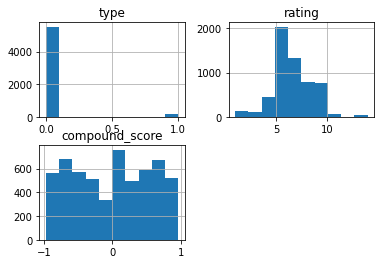

In [ ]:
df.hist()

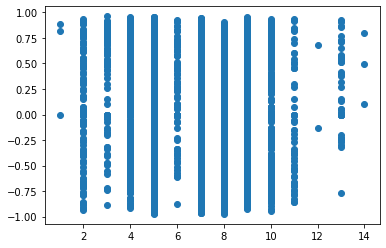

In [ ]:
plt.scatter(df['rating'],df['compound_score'])

<BarContainer object of 5696 artists>

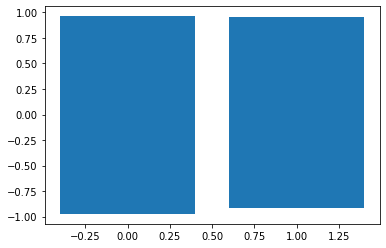

In [ ]:
plt.bar(df['type'], df['compound_score'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


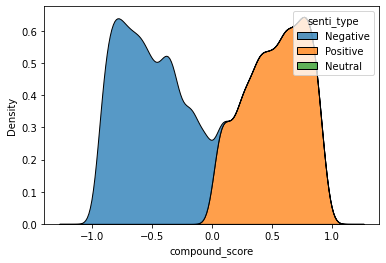

In [ ]:
sns.kdeplot(data=df, x="compound_score", hue="senti_type", multiple="stack")

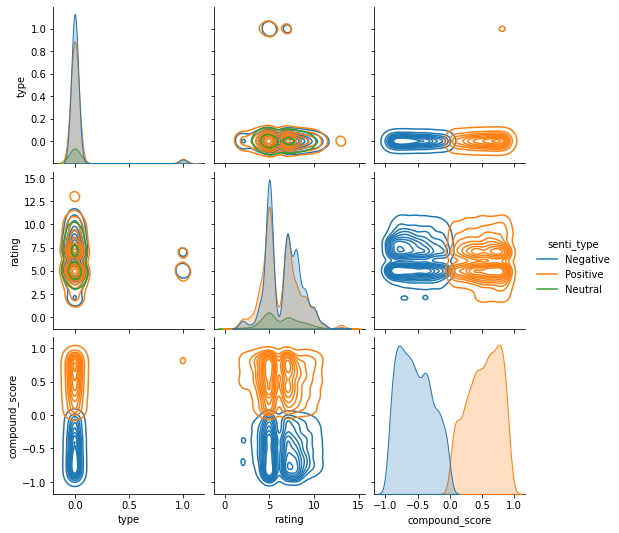

In [ ]:
sns.pairplot(data=df, hue='senti_type',kind='kde')

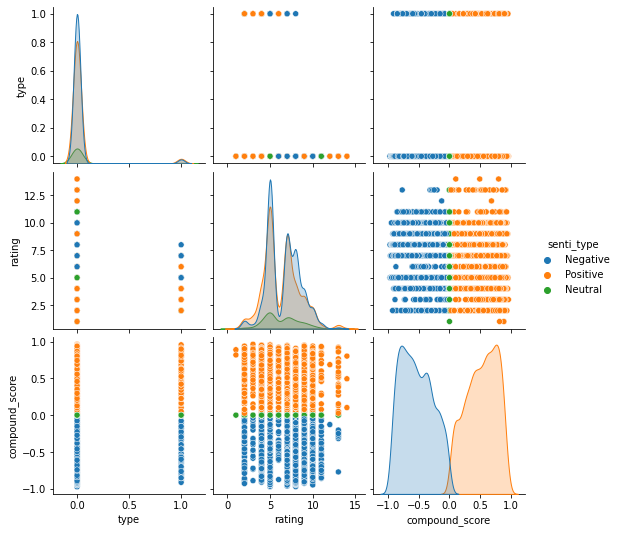

In [ ]:
sns.pairplot(data=df, hue='senti_type')

In [ ]:
df['compound_score'].describe()

count    5696.000000
mean       -0.011200
std         0.561618
min        -0.973200
25%        -0.526700
50%         0.000000
75%         0.495425
max         0.962800
Name: compound_score, dtype: float64

# List of Genre present in netflix

In [ ]:
genreList=['Comedies','Action','Romance','Dramas','Thriller','Horror','Sci-fi','Crime','Fantasy','Documentaries']
positiveGL=['Comedies','Fantasy',] #0.1 to 0.49
VPositiveGL = ['Romance', 'Dramas'] #0.5 to 1.0
negativeGL=['Action','Crime'] #-0.1 to -0.49
VnegativeGL=['Thriller','Horror'] # -0.5 to -1.0
neutralGL=['Sci-fi','Documentaries'] #-0.1 to 0.1


# finding Genre

In [ ]:
# if df['compound_score'] > -0.1 & df['compound_score']< 0.1 :
#   df['Genre'] = neutralGL
# if df['compound_score'] > 0.1 & df['compound_score']< 0.49 :
#   df['Genre'] = positiveGL
# if df['compound_score'] > 0.5 & df['compound_score']< 1 :
#   df['Genre'] = VPositiveGL
# if df['compound_score'] < -0.1 & df['compound_score']> -0.49 :
#   df['Genre'] = negativeGL
# if df['compound_score'] < -0.5 & df['compound_score']> -1 :
#   df['Genre'] = negativeGL

Genre=[]
for row in df['compound_score']:
  if row < -0.5:
    Genre.append(VnegativeGL)
  elif row < -0.1:
    Genre.append(negativeGL)
  elif row < 0.1:
    Genre.append(neutralGL)
  elif row < 0.5:
    Genre.append(positiveGL)
  else:
    Genre.append(VPositiveGL)
print(Genre)
df['Genre']= Genre







[['Thriller', 'Horror'], ['Comedies', 'Fantasy'], ['Romance', 'Dramas'], ['Thriller', 'Horror'], ['Romance', 'Dramas'], ['Thriller', 'Horror'], ['Action', 'Crime'], ['Thriller', 'Horror'], ['Comedies', 'Fantasy'], ['Thriller', 'Horror'], ['Thriller', 'Horror'], ['Romance', 'Dramas'], ['Romance', 'Dramas'], ['Romance', 'Dramas'], ['Sci-fi', 'Documentaries'], ['Thriller', 'Horror'], ['Thriller', 'Horror'], ['Comedies', 'Fantasy'], ['Action', 'Crime'], ['Action', 'Crime'], ['Thriller', 'Horror'], ['Thriller', 'Horror'], ['Thriller', 'Horror'], ['Romance', 'Dramas'], ['Comedies', 'Fantasy'], ['Thriller', 'Horror'], ['Romance', 'Dramas'], ['Action', 'Crime'], ['Action', 'Crime'], ['Sci-fi', 'Documentaries'], ['Romance', 'Dramas'], ['Thriller', 'Horror'], ['Thriller', 'Horror'], ['Comedies', 'Fantasy'], ['Comedies', 'Fantasy'], ['Sci-fi', 'Documentaries'], ['Thriller', 'Horror'], ['Thriller', 'Horror'], ['Romance', 'Dramas'], ['Action', 'Crime'], ['Thriller', 'Horror'], ['Romance', 'Dramas']

In [ ]:
df.head(50)

,type,rating,description,stop_words_removed,lemmatized,compound_score,senti_type,Genre
2,1,5,To protect his family from a powerful drug lor...,"To protect family powerful drug lord , skilled...","to protect family powerful drug lord , skilled...",-0.8860,Negative,"[Thriller, Horror]"
5,1,5,The arrival of a charismatic young priest brin...,The arrival charismatic young priest brings gl...,the arrival charismatic young priest bring glo...,0.1027,Positive,"[Comedies, Fantasy]"
6,0,10,Equestria's divided. But a bright-eyed hero be...,Equestria divided . But bright-eyed hero belie...,Equestria divide . but bright - eyed hero beli...,0.9161,Positive,"[Romance, Dramas]"
7,0,5,"On a photo shoot in Ghana, an American model s...","On photo shoot Ghana , American model slips ti...","on photo shoot Ghana , american model slip tim...",-0.8519,Negative,"[Thriller, Horror]"
8,1,7,A talented batch of amateur bakers face off in...,A talented batch amateur bakers face 10-week c...,a talented batch amateur baker face 10 - week ...,0.8807,Positive,"[Romance, Dramas]"
9,0,9,A woman adjusting to life after a loss contend...,A woman adjusting life loss contends feisty bi...,a woman adjust life loss contend feisty bird t...,-0.5267,Negative,"[Thriller, Horror]"
11,1,5,"Struggling to earn a living in Bangkok, a man ...","Struggling earn living Bangkok , man joins eme...","struggle earn live Bangkok , man join emergenc...",-0.4215,Negative,"[Action, Crime]"
12,0,5,After most of her family is murdered in a terr...,"After family murdered terrorist bombing , youn...","after family murder terrorist bombing , young ...",-0.9313,Negative,"[Thriller, Horror]"
13,0,4,When the clever but socially-awkward Tetê join...,When clever socially-awkward Tetê joins new sc...,when clever socially - awkward Tetê join new s...,0.4678,Positive,"[Comedies, Fantasy]"
18,0,7,After a deadly home invasion at a couple’s new...,After deadly home invasion couple ’ s new drea...,after deadly home invasion couple ' s new drea...,-0.6249,Negative,"[Thriller, Horror]"
